In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이미지 분류 연습 - 머신러닝(KNN)

K-NN 알고리즘을 사용하여 이미지 분류하기

K-NN 알고리즘은 무엇인가?

거리 기반 알고리즘

In [2]:
import pandas as pd
import numpy as np

from skimage.transform import resize
from skimage.io import imread

import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

import os
import warnings
warnings.filterwarnings(action='ignore')

from tqdm import tqdm


In [11]:
datadir = '/content/drive/MyDrive/project3/data/traindata/kfood2'

food_middle_list = os.listdir(datadir)
food_middle_list = sorted(food_middle_list)
food_middle_list[:5]

['구이', '국', '기타', '김치', '나물']

In [12]:
food_list = [] # 음식이름
food_path_list = [] # 음식이름 경로

for food_middle in food_middle_list:
    middle_path = os.path.join(datadir,food_middle)
    food_name_list = os.listdir(middle_path)
    for food in food_name_list:
        path = os.path.join(middle_path,food)
        food_path_list.append(path)

        name = path.split('/')[-1]
        food_list.append(name)

print(len(food_list))
print(food_list)
print(food_path_list)

150
['갈비구이', '갈치구이', '고등어구이', '곱창구이', '장어구이', '떡갈비', '더덕구이', '불고기', '조개구이', '삼겹살', '조기구이', '닭갈비', '훈제오리', '황태구이', '계란국', '떡국_만두국', '무국', '미역국', '시래기국', '콩나물국', '육개장', '북엇국', '젓갈', '양념치킨', '과메기', '콩자반', '편육', '피자', '후라이드치킨', '갓김치', '깍두기', '나박김치', '무생채', '배추김치', '백김치', '부추김치', '열무김치', '오이소박이', '파김치', '총각김치', '가지볶음', '시금치나물', '애호박볶음', '고사리나물', '숙주나물', '미역줄기볶음', '경단', '꿀떡', '송편', '만두', '라면', '막국수', '물냉면', '비빔냉면', '수제비', '열무국수', '콩국수', '짬뽕', '잔치국수', '칼국수', '짜장면', '쫄면', '꽈리고추무침', '도라지무침', '도토리묵', '잡채', '콩나물무침', '회무침', '홍어무침', '누룽지', '김밥', '김치볶음밥', '비빔밥', '새우볶음밥', '알밥', '유부초밥', '잡곡밥', '주먹밥'

In [ ]:
target = []
images = []   # In matrix format
flat_data = []  # In vector format


# food_path_list = food_path_list[:5]

for idx, food_path in enumerate(food_path_list):
    # 각 음식당 필요한 사진 장수

    food = food_path.split('/')[-1]
    print(food_path)

    for idx, img in tqdm(enumerate(os.listdir(food_path))):
        # 각 음식당 필요한 사진 장수
        if idx == 100:
            break
        img_path = os.path.join(food_path,img)
        img_type = img_path.split('.')[-1]
        if (img_type != 'properties') & (img_type != 'csv'):
            img = cv2.imread(img_path)

            if img is None:
                continue

            img_resized = cv2.resize(img, (150, 150))
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(food)

/content/drive/MyDrive/project3/data/traindata/kfood2/구이/갈비구이


100it [00:04, 22.90it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/갈치구이


100it [00:40,  2.48it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/고등어구이


100it [00:41,  2.42it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/곱창구이


100it [00:35,  2.79it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/장어구이


100it [00:20,  4.81it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/떡갈비


100it [00:20,  4.84it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/더덕구이


100it [00:18,  5.52it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/불고기


100it [00:19,  5.25it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/조개구이


100it [00:38,  2.63it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/삼겹살


100it [00:19,  5.17it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/조기구이


100it [00:16,  5.94it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/닭갈비


100it [01:14,  1.34it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/훈제오리


100it [01:01,  1.63it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/구이/황태구이


100it [00:21,  4.67it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/계란국


100it [00:17,  5.83it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/떡국_만두국


100it [00:17,  5.72it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/무국


100it [00:17,  5.65it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/미역국


100it [00:18,  5.55it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/시래기국


100it [00:18,  5.48it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/콩나물국


100it [00:19,  5.24it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/육개장


100it [00:18,  5.44it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/국/북엇국


100it [00:18,  5.43it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/젓갈


100it [00:20,  4.80it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/양념치킨


100it [00:20,  4.90it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/과메기


100it [00:18,  5.44it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/콩자반


100it [00:17,  5.64it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/편육


100it [00:17,  5.75it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/피자


84it [00:21,  2.88it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100it [00:22,  4.49it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/기타/후라이드치킨


100it [00:18,  5.33it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/갓김치


100it [00:17,  5.73it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/깍두기


100it [00:17,  5.58it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/나박김치


100it [00:16,  5.90it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/무생채


100it [00:18,  5.29it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/배추김치


100it [00:17,  5.63it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/백김치


100it [00:17,  5.61it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/부추김치


100it [00:20,  4.96it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/열무김치


100it [00:18,  5.38it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/오이소박이


100it [00:22,  4.44it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/파김치


100it [00:20,  4.86it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/김치/총각김치


100it [00:19,  5.16it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/나물/가지볶음


100it [00:17,  5.77it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/나물/시금치나물


100it [00:20,  4.98it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/나물/애호박볶음


100it [00:17,  5.65it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/나물/고사리나물


100it [00:41,  2.41it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/나물/숙주나물


100it [00:42,  2.35it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/나물/미역줄기볶음


100it [00:17,  5.70it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/떡/경단


100it [00:18,  5.50it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/떡/꿀떡


100it [00:21,  4.61it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/떡/송편


100it [00:16,  6.16it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/만두/만두


100it [00:16,  6.01it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/라면


100it [00:21,  4.56it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/막국수


100it [00:21,  4.60it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/물냉면


100it [00:25,  3.95it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/비빔냉면


100it [00:30,  3.23it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/수제비


100it [00:28,  3.45it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/열무국수


100it [00:19,  5.07it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/콩국수


100it [00:24,  4.14it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/짬뽕


100it [00:24,  4.09it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/잔치국수


100it [00:20,  4.90it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/칼국수


100it [00:21,  4.62it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/짜장면


100it [00:24,  4.08it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/면/쫄면


100it [00:19,  5.26it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/꽈리고추무침


100it [00:22,  4.42it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/도라지무침


100it [00:28,  3.45it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/도토리묵


100it [00:21,  4.66it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/잡채


100it [00:20,  4.92it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/콩나물무침


100it [00:21,  4.56it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/회무침


100it [00:20,  4.96it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/무침/홍어무침


100it [00:18,  5.47it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/누룽지


100it [00:21,  4.63it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/김밥


100it [00:21,  4.65it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/김치볶음밥


100it [00:22,  4.51it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/비빔밥


100it [00:30,  3.27it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/새우볶음밥


100it [00:19,  5.12it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/알밥


100it [00:25,  3.93it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/유부초밥


100it [00:19,  5.14it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/잡곡밥


100it [00:20,  4.90it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/밥/주먹밥


100it [00:18,  5.39it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/감자채볶음


100it [00:18,  5.33it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/건새우볶음


100it [00:19,  5.08it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/소세지볶음


100it [00:20,  4.92it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/떡볶이


100it [00:22,  4.50it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/라볶이


100it [00:18,  5.41it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/두부김치


100it [00:18,  5.29it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/고추장진미채볶음


100it [00:19,  5.19it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/멸치볶음


100it [00:20,  4.90it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/어묵볶음


100it [00:22,  4.38it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/오징어채볶음


100it [00:25,  3.94it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/제육볶음


100it [00:21,  4.59it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/볶음/주꾸미볶음


100it [00:17,  5.67it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/쌈/보쌈


100it [00:22,  4.46it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/음청류/식혜


100it [00:22,  4.48it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/음청류/수정과


100it [00:42,  2.34it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/장/양념게장


100it [00:19,  5.18it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/장/간장게장


100it [00:23,  4.21it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/장아찌/깻잎장아찌


100it [00:19,  5.19it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/적/떡꼬치


100it [00:21,  4.69it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/감자전


100it [00:20,  5.00it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/계란말이


100it [00:19,  5.09it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/계란후라이


100it [00:22,  4.44it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/김치전


100it [00:25,  3.88it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/동그랑땡


100it [00:19,  5.26it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/생선전


100it [00:18,  5.27it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/호박전


100it [00:20,  4.85it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전/파전


100it [00:24,  4.14it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/전골/곱창전골


100it [00:23,  4.28it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/갈치조림


100it [00:21,  4.65it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/감자조림


100it [00:19,  5.00it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/고등어조림


100it [00:20,  4.77it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/꽁치조림


100it [00:22,  4.39it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/두부조림


100it [00:22,  4.51it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/땅콩조림


100it [00:20,  4.92it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/메추리알장조림


100it [00:21,  4.67it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/연근조림


100it [00:21,  4.76it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/우엉조림


100it [00:26,  3.84it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/장조림


100it [00:27,  3.66it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/조림/코다리조림


100it [00:24,  4.03it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/죽/전복죽


100it [00:20,  4.88it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/죽/호박죽


100it [00:19,  5.10it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찌개/김치찌개


100it [00:24,  4.02it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찌개/닭계장


100it [00:20,  4.96it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찌개/동태찌개


100it [00:18,  5.54it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찌개/된장찌개


66it [00:40,  1.62it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찌개/순두부찌개


100it [00:21,  4.57it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/갈비찜


15it [00:54,  3.64s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/계란찜


4it [00:06,  1.71s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/김치찜


10it [00:25,  2.57s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/순대


38it [01:14,  1.97s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/수육


12it [00:27,  2.27s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/꼬막찜


0it [00:00, ?it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/닭볶음탕


14it [00:41,  2.98s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/찜닭


14it [00:51,  3.65s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/족발


24it [01:18,  3.26s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/찜/해물찜


20it [00:50,  2.53s/it]


/content/drive/MyDrive/project3/data/traindata/kfood2/탕/매운탕


100it [00:19,  5.21it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/탕/갈비탕


100it [00:24,  4.03it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/탕/곰탕_설렁탕


100it [00:21,  4.61it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/탕/감자탕


100it [00:22,  4.49it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/탕/삼계탕


100it [00:19,  5.10it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/탕/추어탕


100it [00:21,  4.75it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/튀김/고추튀김


100it [00:21,  4.67it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/튀김/새우튀김


100it [00:20,  4.78it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/튀김/오징어튀김


100it [00:20,  4.80it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/한과/약식


100it [00:19,  5.01it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/한과/한과


100it [00:20,  4.78it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/한과/약과


100it [00:20,  4.91it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/해물/멍게


100it [00:24,  4.05it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/해물/산낙지


100it [00:22,  4.50it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/회/물회


100it [00:19,  5.11it/s]


/content/drive/MyDrive/project3/data/traindata/kfood2/회/육회


100it [00:19,  5.22it/s]


In [ ]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.035555,0.067790,0.079386,0.038809,0.072660,0.088959,0.042642,0.077935,0.097711,0.045234,...,0.030312,0.102698,0.135215,0.028054,0.098675,0.143395,0.025386,0.095974,0.137256,갈비구이
1,0.299977,0.211950,0.211785,0.292519,0.199310,0.200188,0.281326,0.197867,0.196121,0.248656,...,0.795894,0.776286,0.893933,0.795978,0.776153,0.894126,0.798889,0.771538,0.900800,갈비구이
2,0.631304,0.585982,0.503807,0.615098,0.560471,0.467669,0.533000,0.477228,0.379763,0.494875,...,0.751416,0.742865,0.762377,0.730667,0.710659,0.723617,0.679076,0.655578,0.663483,갈비구이
3,0.763792,0.777083,0.760435,0.471623,0.482354,0.434299,0.650069,0.708279,0.645755,0.699220,...,0.101808,0.125153,0.172414,0.099667,0.128222,0.172722,0.092703,0.123876,0.167061,갈비구이
4,0.409095,0.405331,0.385235,0.545400,0.544390,0.516032,0.539583,0.539528,0.508300,0.540983,...,0.461691,0.434085,0.410940,0.460575,0.430844,0.416010,0.343470,0.323279,0.310524,갈비구이


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

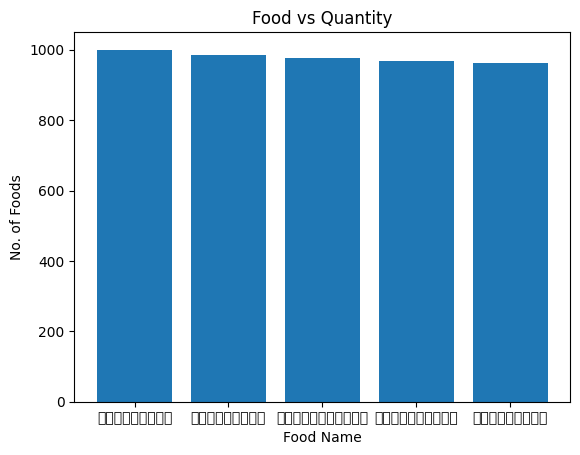

In [ ]:
# Display of the number of images of each Food type
plt.bar(df['Target'].unique(),df['Target'].value_counts())
plt.title('Food vs Quantity')
plt.xlabel('Food Name')
plt.ylabel('No. of Foods')
plt.show()


In [ ]:
# Input and Output
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

3) Classification of images using KNN Classification Algorithm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# k=np.arange(1,160)
k = [i if i != 0 else 1 for i in range(0, 160, 5)]
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                         50, 55, 60, 65, 70, 75, 80, 85, 90, 95,
                                         100, 105, 110, 115, 120, 125, 130, 135,
                                         140, 145, ...]})

In [ ]:
# Best K nearest neighbor
model_grid.best_params_

{'n_neighbors': 155}

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
best_k = model_grid.best_params_['n_neighbors']
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=155)

In [ ]:
# Predicted output
y_pred = model.predict(x_test)
y_pred

array(['고등어구이', '갈비구이', '곱창구이', ..., '곱창구이',
       '갈비구이', '곱창구이'], dtype=object)

In [ ]:
# Actual output
y_test

array(['갈비구이', '곱창구이', '갈치구이', ..., '장어구이',
       '장어구이', '곱창구이'], dtype=object)

In [ ]:
# Evaluation of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy of the model is  34.91414554374489 %


# 4) Confusion matrix and Classification report

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[ 81,  15,  32,   7,  30],
       [ 41, 117,  73,  34,  41],
       [ 47,  22,  56,  24,  57],
       [ 68,  87,  74, 158, 127],
       [  6,   1,   4,   6,  15]])

In [ ]:
# Classification report
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   갈비구이       0.49      0.33      0.40       243
   갈치구이       0.38      0.48      0.43       242
 고등어구이       0.27      0.23      0.25       239
  곱창구이       0.31      0.69      0.43       229
   장어구이       0.47      0.06      0.10       270

    accuracy                           0.35      1223
   macro avg       0.38      0.36      0.32      1223
weighted avg       0.39      0.35      0.31      1223



# 5) Prediction for new image

In [ ]:
# # Resizing and flattening new image 1
# img1=imread('/content/drive/My Drive/images/New prediction images/plantsguru-flowering-plants-rose-red-800x800.jpg')
# img1_resize = resize(img1,(150,150,3))
# img1_flatten = img1_resize.flatten()


In [ ]:

# img1_pred = model.predict([img1_flatten])
# img1_pred

In [ ]:

# plt.imshow(img1)